In [22]:
#combine files 
import glob 
import os
#clean 
import string
import pandas as pd
import numpy as np
import emoji
import nltk
import re 
from cleantext import clean
#sleep timer 
import time 
import logging
import threading
#show most common words
from collections import Counter
#word cloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [23]:
files = os.path.join("raw g reviews/*.csv")
files = glob.glob(files)
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df.to_csv("tnt_combined.csv")
df

,id_review,caption,relative_date,retrieval_date,rating,username,n_review_user,n_photo_user,url_user
0,ChdDSUhNMG9nS0VJQ0FnSUNXNHFxU2x3RRAB,(Translated by Google) good (Original) ดี,a month ago,2022-03-29 20:10:15.953287,4.0,Wittayarat Athijorn,0,0,https://www.google.com/maps/contrib/1132492698...
1,ChdDSUhNMG9nS0VJQ0FnSUNXcktYOW9RRRAB,(Translated by Google) Easy to contact. Strict...,a month ago,2022-03-29 20:10:15.954798,4.0,SIRICHAI SUWANASRI,0,0,https://www.google.com/maps/contrib/1133895666...
2,ChdDSUhNMG9nS0VJQ0FnSUNXdU5pMml3RRAB,NaN,a month ago,2022-03-29 20:10:15.956357,5.0,พายุพรรดิ์ คงสินธุ์,0,0,https://www.google.com/maps/contrib/1162441352...
3,ChdDSUhNMG9nS0VJQ0FnSURtNW9uZmhBRRAB,NaN,2 months ago,2022-03-29 20:10:15.958604,5.0,TN Claire,0,0,https://www.google.com/maps/contrib/1038126467...
4,ChdDSUhNMG9nS0VJQ0FnSUNtX3QzVXh3RRAB,"Well organized, friendly staff, very helpful, ...",2 months ago,2022-03-29 20:10:15.960549,5.0,Anthony Verloop,0,0,https://www.google.com/maps/contrib/1000538412...
...,...,...,...,...,...,...,...,...,...
426,ChdDSUhNMG9nS0VJQ0FnSUNBZ2RmM3ZBRRAB,Prepared everthing before going here.,5 years ago,2022-03-29 21:15:14.419167,3.0,Kanit Nutong C.D.M.,0,0,https://www.google.com/maps/contrib/1177886272...
427,ChdDSUhNMG9nS0VJQ0FnSUNNajRUcDd3RRAB,NaN,5 years ago,2022-03-29 21:15:20.885650,5.0,chat yoddanklang,0,0,https://www.google.com/maps/contrib/1123897304...
428,ChZDSUhNMG9nS0VJQ0FnSUNNOV9US2VREAE,NaN,6 years ago,2022-03-29 21:15:20.886996,5.0,yod danklang,0,0,https://www.google.com/maps/contrib/1016579609...
429,ChdDSUhNMG9nS0VJQ0FnSUNNOV9uRTNnRRAB,NaN,6 years ago,2022-03-29 21:15:20.888400,5.0,Narongdej Watcharapasorn,0,0,https://www.google.com/maps/contrib/1055578773...


In [24]:
df1 = pd.read_csv('tnt_combined.csv')
df1 = df1.dropna()

In [25]:
column_titles = ['rating','caption']
df1 = df1.reindex(columns=column_titles)
df1

,rating,caption
0,4.0,(Translated by Google) good (Original) ดี
1,4.0,(Translated by Google) Easy to contact. Strict...
4,5.0,"Well organized, friendly staff, very helpful, ..."
10,5.0,(Translated by Google) To be a global integrat...
12,3.0,Well after a lot of looking i find out the Ban...
...,...,...
416,5.0,Great service
417,4.0,"Not easy to go but google map can help, 2 ways..."
418,5.0,Best service
420,5.0,Great service


In [26]:
df1['middle'] = df1['caption'].str.split(")").str[1] 
df1['Reviews'] = df1['middle'].str.split("(").str[0]

df1 = df1.reset_index()

In [27]:
df1['Reviews'].fillna('0', inplace = True)
for i, row in df1.iterrows(): 
    review = row['Reviews']
    if review == '0':
        df1['Reviews'][i] = review.replace('0', row['caption'])
df1

/var/folders/5w/0kxl7gbj5vqb93sccvkxwrzc0000gn/T/ipykernel_62950/4092710684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Reviews'][i] = review.replace('0', row['caption'])


,index,rating,caption,middle,Reviews
0,0,4.0,(Translated by Google) good (Original) ดี,good (Original,good
1,1,4.0,(Translated by Google) Easy to contact. Strict...,Easy to contact. Strict anti-Covid-19 measure...,Easy to contact. Strict anti-Covid-19 measure...
2,4,5.0,"Well organized, friendly staff, very helpful, ...",NaN,"Well organized, friendly staff, very helpful, ..."
3,10,5.0,(Translated by Google) To be a global integrat...,To be a global integrated logistics company ...,To be a global integrated logistics company
4,12,3.0,Well after a lot of looking i find out the Ban...,NaN,Well after a lot of looking i find out the Ban...
...,...,...,...,...,...
194,416,5.0,Great service,NaN,Great service
195,417,4.0,"Not easy to go but google map can help, 2 ways...",NaN,"Not easy to go but google map can help, 2 ways..."
196,418,5.0,Best service,NaN,Best service
197,420,5.0,Great service,NaN,Great service


### Clean the data

In [28]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation, remove words containing numbers and lemmatize/stem.'''
    text = str(text).lower()
    text = re.sub('#\w*', '', text)
    text = re.sub('@\w*', '', text)    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = clean(text, no_emoji=True)
    text = emoji.demojize(text, delimiters=("", "")) #change emoji into text 
    text = ' '.join([word for word in text.split() if word not in (stop)])
    return text

# Let's take a look at the updated text
df1['Reviews_processed'] = pd.DataFrame(df1['Reviews'].apply(clean_text_round1))
df1

,index,rating,caption,middle,Reviews,Reviews_processed
0,0,4.0,(Translated by Google) good (Original) ดี,good (Original,good,good
1,1,4.0,(Translated by Google) Easy to contact. Strict...,Easy to contact. Strict anti-Covid-19 measure...,Easy to contact. Strict anti-Covid-19 measure...,easy contact strict measures
2,4,5.0,"Well organized, friendly staff, very helpful, ...",NaN,"Well organized, friendly staff, very helpful, ...",well organized friendly staff helpful excellen...
3,10,5.0,(Translated by Google) To be a global integrat...,To be a global integrated logistics company ...,To be a global integrated logistics company,global integrated logistics company
4,12,3.0,Well after a lot of looking i find out the Ban...,NaN,Well after a lot of looking i find out the Ban...,well lot looking find bangkok call centre numb...
...,...,...,...,...,...,...
194,416,5.0,Great service,NaN,Great service,great service
195,417,4.0,"Not easy to go but google map can help, 2 ways...",NaN,"Not easy to go but google map can help, 2 ways...",easy go google map help ways go chaengwattana ...
196,418,5.0,Best service,NaN,Best service,best service
197,420,5.0,Great service,NaN,Great service,great service


### Sentiment analysis 


In [29]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def clean_text_round2(text):
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output
df1['Reviews_processed2'] = pd.DataFrame(df1['Reviews_processed'].apply(clean_text_round2))


In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    if sentiment_dict['compound'] >= 0.05 : 
       return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
    else : 
       return "Neutral"
        
df1['Sentiment'] = pd.DataFrame(df1['Reviews_processed2'].apply(sentiment_scores))

In [31]:
column_titles = ['rating','Reviews','Sentiment']
df2 = df1.reindex(columns=column_titles)
df2

,rating,Reviews,Sentiment
0,4.0,good,Positive
1,4.0,Easy to contact. Strict anti-Covid-19 measure...,Positive
2,5.0,"Well organized, friendly staff, very helpful, ...",Positive
3,5.0,To be a global integrated logistics company,Neutral
4,3.0,Well after a lot of looking i find out the Ban...,Positive
...,...,...,...
194,5.0,Great service,Positive
195,4.0,"Not easy to go but google map can help, 2 ways...",Positive
196,5.0,Best service,Positive
197,5.0,Great service,Positive


In [32]:
df2.to_csv('tnt_Greviews.csv')

In [33]:
df_neg = df1.drop(df1[df1['Sentiment'] != 'Negative'].index)
df_neg

,index,rating,caption,middle,Reviews,Reviews_processed,Reviews_processed2,Sentiment
21,40,1.0,Really bad service!!!!!!!!!!!!!!,NaN,Really bad service!!!!!!!!!!!!!!,really bad service,really bad service,Negative
22,42,1.0,really bad Service not correct declaration bet...,NaN,really bad Service not correct declaration bet...,really bad service correct declaration better ...,really bad service correct declaration better ...,Negative
29,60,1.0,(Translated by Google) Can you change the gate...,Can you change the gate again? The door is ve...,Can you change the gate again? The door is ve...,change gate door difficult open prolonged fixe...,change gate door difficult open prolonged fixe...,Negative
39,72,1.0,Sent my father's watch to UK they lost it at S...,NaN,Sent my father's watch to UK they lost it at S...,sent fathers watch uk lost stansted delete fin...,sent father watch uk lost stansted delete find...,Negative
87,171,3.0,(Translated by Google) My sister in Korat sent...,My sister in Korat sent mangoes to Sent on Fr...,My sister in Korat sent mangoes to Sent on Fr...,sister korat sent mangoes sent friday may tues...,sister korat sent mango sent friday may tuesda...,Negative
95,201,1.0,"(Translated by Google) Terrible service, talk ...","Terrible service, talk loudly And when speaki...","Terrible service, talk loudly And when speaki...",terrible service talk loudly speaking didnt he...,terrible service talk loudly speaking didnt he...,Negative
123,250,5.0,(Translated by Google) A lot of people but the...,A lot of people but the staff work hard. (Or...,A lot of people but the staff work hard.,lot people staff work hard,lot people staff work hard,Negative
125,253,1.0,(Translated by Google) Waiting for the item to...,Waiting for the item to be delivered for a ve...,Waiting for the item to be delivered for a ve...,waiting item delivered long time need order it...,waiting item delivered long time need order it...,Negative
139,272,1.0,(Translated by Google) Terrible service. The d...,Terrible service. The delivery staff spoke ba...,Terrible service. The delivery staff spoke ba...,terrible service delivery staff spoke badly do...,terrible service delivery staff spoke badly do...,Negative
157,320,1.0,Very bad service unlike its very expensive pri...,NaN,Very bad service unlike its very expensive pri...,bad service unlike expensive pricing parcel ar...,bad service unlike expensive pricing parcel ar...,Negative


In [34]:
#combining the text into one long string for word cloud 
cloud_string = df_neg['Reviews_processed2'].str.cat(sep=' ')

In [35]:
# Let's first pull out the top 30 words for each category
words = []
for word in cloud_string.split():
        words.append(word)
Counter(words).most_common()

[('service', 7),
 ('...', 6),
 ('bad', 4),
 ('use', 3),
 ('sent', 3),
 ('mango', 3),
 ('time', 3),
 ('item', 3),
 ('answer', 3),
 ('really', 2),
 ('lost', 2),
 ('may', 2),
 ('havent', 2),
 ('first', 2),
 ('terrible', 2),
 ('speaking', 2),
 ('didnt', 2),
 ('badly', 2),
 ('work', 2),
 ('staff', 2),
 ('waiting', 2),
 ('delivered', 2),
 ('dont', 2),
 ('phone', 2),
 ('bring', 2),
 ('document', 2),
 ('correct', 1),
 ('declaration', 1),
 ('better', 1),
 ('dhl', 1),
 ('change', 1),
 ('gate', 1),
 ('door', 1),
 ('difficult', 1),
 ('open', 1),
 ('prolonged', 1),
 ('fixed', 1),
 ('father', 1),
 ('watch', 1),
 ('uk', 1),
 ('stansted', 1),
 ('delete', 1),
 ('find', 1),
 ('since', 1),
 ('nov', 1),
 ('disappeared', 1),
 ('system', 1),
 ('sister', 1),
 ('korat', 1),
 ('friday', 1),
 ('tuesday', 1),
 ('received', 1),
 ('yet', 1),
 ('fear', 1),
 ('rotten', 1),
 ('therefore', 1),
 ('went', 1),
 ('talk', 1),
 ('loudly', 1),
 ('hear', 1),
 ('scolded', 1),
 ('suitable', 1),
 ('poor', 1),
 ('last', 1),
 ('mo

In [36]:
#add meaningless words to stopwords
add_stop_words = ['...' , 'package', 'even', 'use','call','one','though', 'didnt', 'dont', 'hasnt', 'c',]
stop_words = add_stop_words + stop 

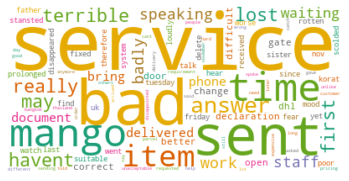

In [37]:
#wordcloud for top 100 words 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42, max_words = 100)

wordcloud = wc.generate(cloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

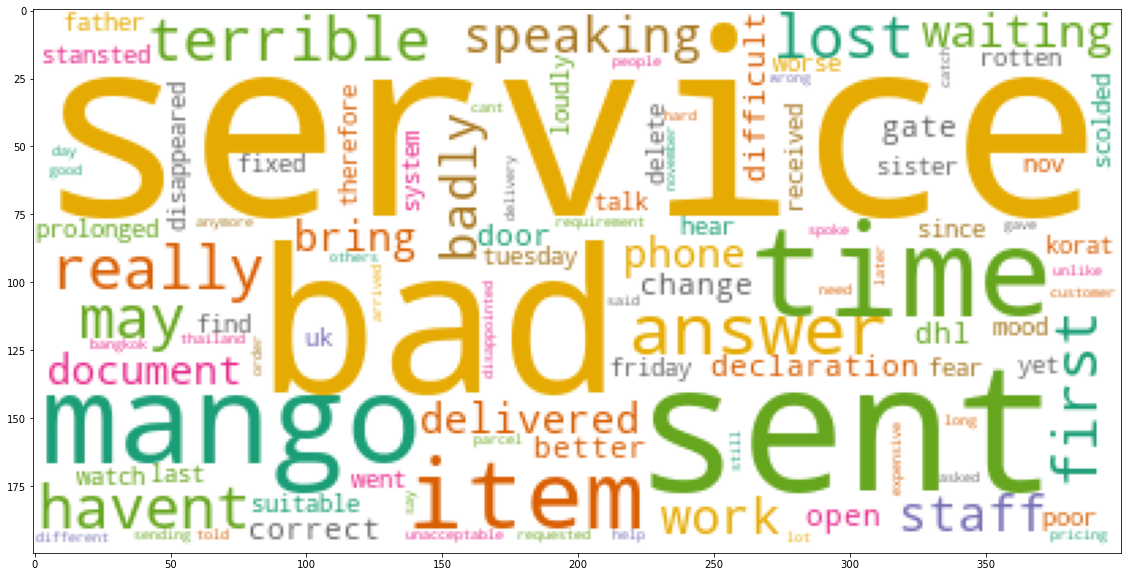

In [38]:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

In [39]:
late_words = ['slow', 'late', 'long']
df_late = df_neg[df_neg['Reviews_processed2'].str.contains('|'.join(late_words))]
df_late = df_late.rename(columns ={'Reviews_processed2':'Late reviews'})

In [40]:
column_titles = ['rating','Reviews','Sentiment']
df_late = df_late.reindex(columns=column_titles)
df_late

,rating,Reviews,Sentiment
29,1.0,Can you change the gate again? The door is ve...,Negative
125,1.0,Waiting for the item to be delivered for a ve...,Negative


In [41]:
df_late.to_csv('Late_reviews_tnt.csv')